In [1]:
# %load ./import.py
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
!ls ./Data

Baseball96.xlsx  Countryregion.xlsx  Grocery.xlsx  USmacrodata.xls
Cardata.xlsx	 Fizzy.xlsx	     Oreos.xlsx


In [2]:
from ols_diag import ols_diag

### 6.       The file Oreos.xlsx gives daily sales of Oreos at a supermarket and whether Oreos were placed 7” from the floor, 6” from the floor, or 5” from the floor. How does shelf position influence Oreo sales?


In [3]:
oo=pd.read_excel("./Data/Oreos.xlsx")
oo.head()

,Observation,Height in feet,Sales
0,1,5,28
1,2,6,61
2,3,7,40
3,4,5,29
4,5,5,36


In [4]:
oo_dum_col=['Height in feet']
ood=pd.get_dummies(oo, prefix_sep='_', dummy_na=False, columns=oo_dum_col)
ood.head()

,Observation,Sales,Height in feet_5,Height in feet_6,Height in feet_7
0,1,28,1,0,0
1,2,61,0,1,0
2,3,40,0,0,1
3,4,29,1,0,0
4,5,36,1,0,0


In [5]:
ood.columns

Index(['Observation', 'Sales', 'Height in feet_5', 'Height in feet_6',
       'Height in feet_7'],
      dtype='object')

In [6]:
y_6=ood["Sales"]
X_6=ood[['Height in feet_5','Height in feet_6', 'Height in feet_7']]

#### OLS Modeling

In [7]:
X_6=sm.add_constant(X_6)
model_6=sm.OLS(y_6, X_6).fit()
model_6.summary()

/home/boo/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     27.99
Date:                Tue, 30 Apr 2019   Prob (F-statistic):           0.000137
Time:                        03:52:57   Log-Likelihood:                -33.358
No. Observations:                  12   AIC:                             72.72
Df Residuals:                       9   BIC:                             74.17
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               30.6250      0.975     31.412      0.000      28.420      32.830
Height in feet_5     0.8750      1.867      0.469      0.650      -3.348       5.098
Height in feet_6    23.6250      1.867     12.655      0.000      19.402      27.848
Height in feet_7     6.1250      1.867      3.281      0.010       1.902      10.348
==============================================================================
Omnibus:                        0.597   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.742   Jarque-Bera (JB):                0.549
Skew:                          -0.008   Prob(JB):                        0.760
Kurtosis:                       1.952   Cond. No.                     1.21e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.1e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### OLS Diagnostic test

Dataset: 	 12
X: 	 12
1. Normality Test:  Jarque-Bera Test
-----------------------------------------------
Good
Reason: Residual Normally distributed
-----------------------------------------------


2. Linearity Test:  Rainbow Test
-----------------------------------------------
Good
Reason: Data have linear relationship
-----------------------------------------------


3. Heteroscedasticity Test:  Breusch-Pagan Test
-----------------------------------------------
Good
Reason: Data have same variance accross
-----------------------------------------------


4. Autocorrelation Test:  Breusch Godfrey Test
-----------------------------------------------
Good
Reason: Data are not related to themself:1 lag
-----------------------------------------------


5. Sum of residuals == 0
-----------------------------------------------
Good
Reason: Sum of residuals = 0
-----------------------------------------------


6. Checking outliers:
-----------------------------------------------
Mode select

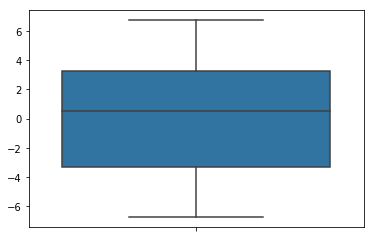

-----------------------------------------------



7. Checking multicolinearity
-----------------------------------------------


<Figure size 432x288 with 0 Axes>

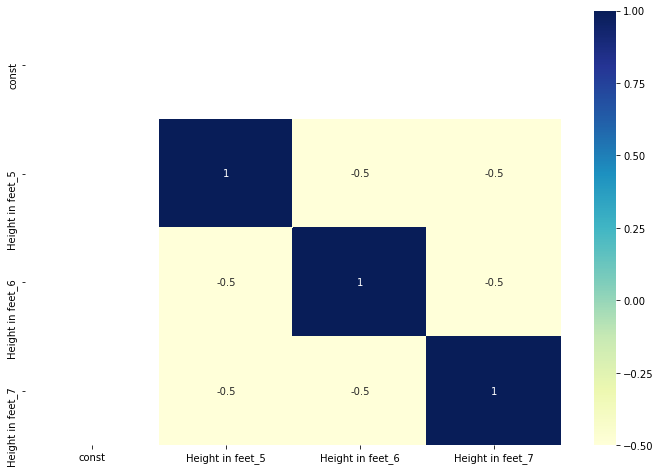

-----------------------------------------------


<Figure size 432x288 with 0 Axes>

In [8]:
ols_diag(ood,X_6,model_6)

#### Ans 6 and Conclusion
1. All our diagonetic test are good.
2. It is recommeded to keep product in 6" or 7" inch from floor.
3. It seems that people do not like bending heads to find product and retailers must not have lower shelf or display purpose, as it is waste of money. 
